# HR Analytics – Predict Employee Attrition

# Data checking & cleaning

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('HR_Dataset.csv')

In [3]:
df.shape

(1470, 35)

In [4]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [7]:
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


In [8]:
# Missing values
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
# Duplicates
df.duplicated().sum()

np.int64(0)

In [10]:
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

In [11]:
df['Attrition_flag'].value_counts(normalize=True)

Attrition_flag
0    0.838776
1    0.161224
Name: proportion, dtype: float64

# Exploratory Data Analysis (EDA) (Day 2)

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

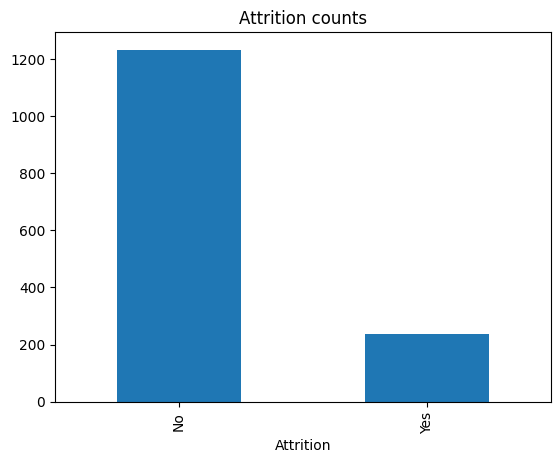

In [13]:
# Attrition rate
df['Attrition'].value_counts().plot(kind='bar', title='Attrition counts')
plt.show()

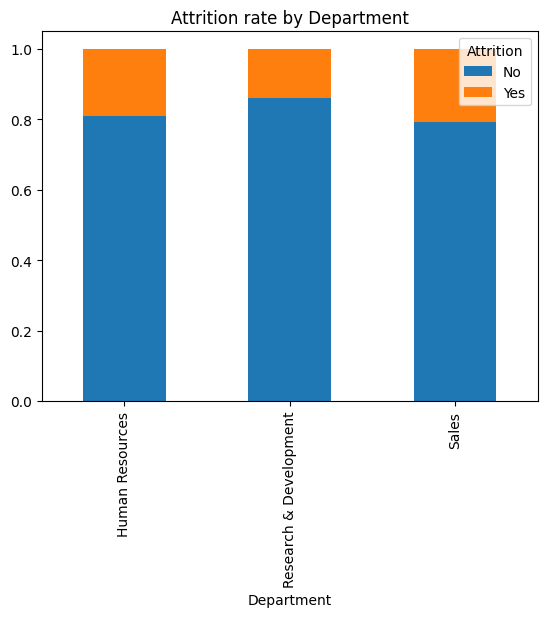

In [14]:
# Attrition by Department
pd.crosstab(df['Department'], df['Attrition'], normalize='index').plot(kind='bar', stacked=True)
plt.title('Attrition rate by Department')
plt.show()

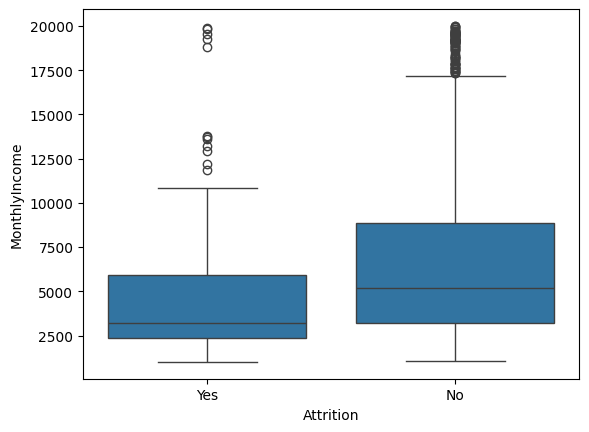

In [15]:
# Boxplot - MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.show()

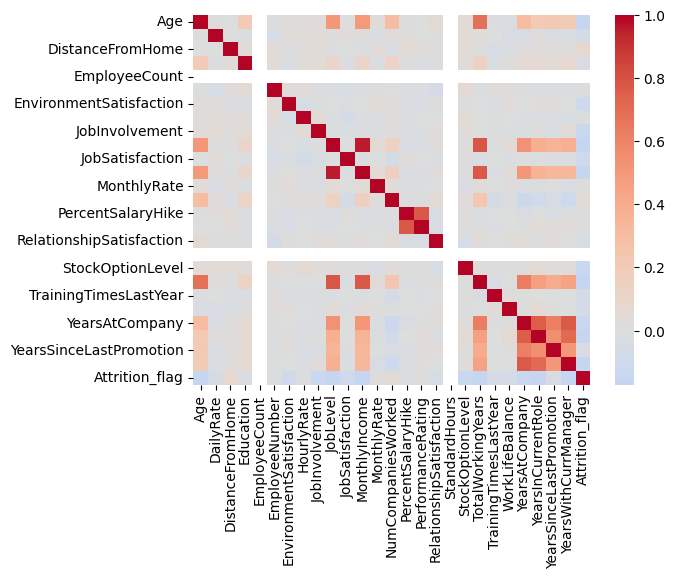

In [16]:
# Correlation for numeric features
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
sns.heatmap(df[num_cols].corr(), cmap='coolwarm', center=0)
plt.show()

# Feature engineering & preprocessing 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [18]:
X = df.drop(columns=['Attrition', 'Attrition_flag'])
y = df['Attrition_flag']

In [19]:
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])

In [22]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

In [23]:
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('cat', cat_transformer, cat_cols)
])

# Baseline models

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

In [25]:
lr_clf = make_pipeline(preprocessor,LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)
y_proba = lr_clf.predict_proba(X_test)[:,1]

In [26]:
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

              precision    recall  f1-score   support

           0       0.92      0.77      0.83       247
           1       0.34      0.64      0.44        47

    accuracy                           0.74       294
   macro avg       0.63      0.70      0.64       294
weighted avg       0.83      0.74      0.77       294

ROC-AUC: 0.7982599707123784


In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

smote = SMOTE(random_state=42)
rf = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = ImbPipeline(steps=[('pre', preprocessor), ('smote', smote), ('clf', rf)])
pipeline.fit(X_train, y_train)


,steps,"[('pre', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


# Model tuning & validation

In [28]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

param_grid = {
    'clf__n_estimators':[100,300],
    'clf__max_depth':[None,10,20],
    'clf__min_samples_split':[2,5]
}

cv = StratifiedKFold(n_splits=5)
pipe = Pipeline(steps=[('pre', preprocessor), ('clf', RandomForestClassifier(random_state=42))])
gs = GridSearchCV(pipe, param_grid, scoring='f1', cv=cv, n_jobs=-1)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_


({'clf__max_depth': None,
  'clf__min_samples_split': 5,
  'clf__n_estimators': 300},
 np.float64(0.3301756121505031))

In [31]:
def get_feature_names(column_transformer):
    output_features = []

    for name, transformer, features in column_transformer.transformers_:
        if name == 'remainder' and transformer == 'drop':
            continue

        # If the transformer itself is a pipeline
        if hasattr(transformer, 'named_steps'):
            for step_name, step in transformer.named_steps.items():
                if isinstance(step, type(column_transformer)):  # nested ColumnTransformer
                    output_features.extend(get_feature_names(step))
                elif hasattr(step, 'get_feature_names_out'):
                    output_features.extend(step.get_feature_names_out(features))
        elif hasattr(transformer, 'get_feature_names_out'):
            output_features.extend(transformer.get_feature_names_out(features))
        else:
            output_features.extend(features)

    return output_features


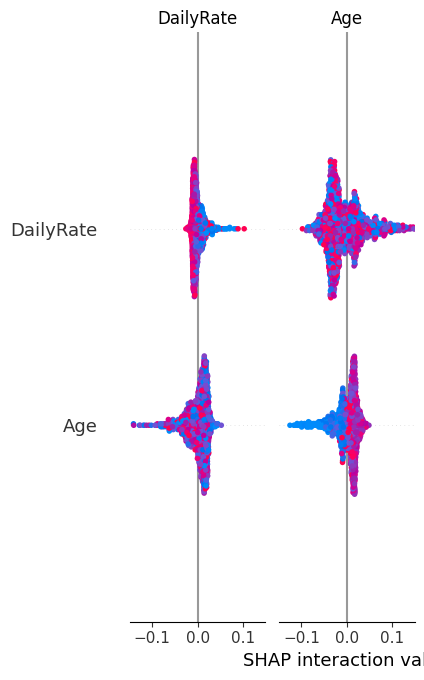

In [32]:
feature_names = get_feature_names(preprocessor)

explainer = shap.Explainer(clf)
shap_values = explainer(X_train_trans)

shap.summary_plot(shap_values, features=X_train_trans, feature_names=feature_names)

In [33]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

In [35]:
import os

test_out = X_test.copy()

test_out['actual'] = y_test.values
test_out['pred_proba'] = y_proba
test_out['pred_label'] = (y_proba > 0.4).astype(int) 

output_dir = 'outputs'
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, 'attrition_predictions_for_pbi.csv')
test_out.to_csv(output_path, index=False)

print(f"File saved successfully at: {os.path.abspath(output_path)}")


File saved successfully at: C:\Users\rawat\Desktop\Internship\Project 1\outputs\attrition_predictions_for_pbi.csv
